# Gesture Recognition Experiment - DTW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

from scipy.spatial.distance import euclidean

from dtaidistance import dtw_ndim
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

from fastdtw import fastdtw

from helper.GestureAuthentication import GestureAuthenticator

g = GestureAuthenticator()


In [2]:
CHOOSED_ALGORITHM = "softdtw"

Experiment Set Up
-------------------

|      Algorithms     |
|:--------------------|
| DTW                 |
| FastDTW             |
| Pearson Correlation |
| Euclidean Distance  | 

<br/>

| Gesture Complexity | Gesture Name             |
|--------------------|--------------------------|
| Simple             | Circle, Square, Triangle |
| Medium             | Bowtie, Tornado          |
| Complex            | Signature                |

## Gesture 1: Circle

### Load Data

In [4]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/circle_27012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 35


### Check Same Person Authentication (FRR)

In [5]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0654		0.0058
2	True		0.0826		0.0052
3	True		0.1302		0.0073
4	True		0.1406		0.0060
5	True		0.0545		0.0052
6	True		0.1424		0.0059
7	True		0.0947		0.0050
8	True		0.0462		0.0079
9	True		0.0816		0.0050
10	True		0.1023		0.0050
11	True		0.0811		0.0044
12	True		0.0628		0.0048
13	True		0.0895		0.0052
14	True		0.0618		0.0059
15	False		0.1713		0.0047
16	True		0.0736		0.0052
17	True		0.1337		0.0067
18	True		0.0737		0.0045
19	True		0.1384		0.0056
20	True		0.0673		0.0056
21	True		0.1203		0.0071
22	True		0.1434		0.0059
23	False		0.1552		0.0054
24	True		0.1248		0.0063
25	True		0.1400		0.0063
26	True		0.0406		0.0059
27	True		0.0493		0.0052
28	True		0.1442		0.0057
29	True		0.0759		0.0049
30	True		0.0691		0.0051

False Rejection Rate (FRR): 6.667 %
Average Time: 0.0056


### Check Different Person Authentication (FAR)

In [6]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2763		0.0051
2	False		0.3181		0.0046
3	False		0.4968		0.0036
4	False		0.3440		0.0036
5	False		0.4466		0.0035
6	False		0.2463		0.0023
7	False		0.4858		0.0031
8	False		0.5426		0.0051
9	False		0.2574		0.0043
10	False		0.5151		0.0041
11	True		0.0880		0.0056
12	False		0.4472		0.0031
13	False		0.3146		0.0035
14	False		0.2462		0.0021
15	False		0.4817		0.0030
16	False		0.4427		0.0027
17	True		0.0567		0.0073
18	False		0.3712		0.0027
19	False		0.3092		0.0061
20	False		0.3011		0.0027
21	False		0.2681		0.0046
22	False		0.6687		0.0038
23	False		0.3119		0.0040
24	False		0.1551		0.0046
25	False		0.5487		0.0025
26	False		0.4188		0.0030
27	False		0.4714		0.0038
28	False		0.5056		0.0040
29	False		0.3973		0.0030
30	False		0.3300		0.0040
31	False		0.2446		0.0049
32	False		0.3956		0.0051
33	False		0.2960		0.0041
34	False		0.2309		0.0038
35	True		0.0753		0.0053

False Acceptance Rate (FAR): 8.571 %
Average Time: 0.0040


## Gesture 2: Square

### Load Data

In [8]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/square_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [9]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0973		0.0049
2	True		0.0896		0.0038
3	True		0.0900		0.0047
4	True		0.0900		0.0037
5	True		0.0888		0.0041
6	True		0.0871		0.0050
7	True		0.0913		0.0048
8	True		0.0889		0.0042
9	True		0.0930		0.0039
10	True		0.0945		0.0036
11	True		0.0822		0.0050
12	True		0.1111		0.0034
13	True		0.0911		0.0048
14	True		0.0853		0.0043
15	True		0.0878		0.0038
16	True		0.0864		0.0050
17	True		0.0859		0.0046
18	True		0.0894		0.0042
19	True		0.0848		0.0059
20	True		0.0844		0.0044
21	True		0.0938		0.0041
22	True		0.1034		0.0037
23	True		0.1244		0.0036
24	True		0.1115		0.0047
25	True		0.1111		0.0036
26	True		0.0878		0.0042
27	True		0.0933		0.0038
28	True		0.0856		0.0040
29	True		0.0992		0.0037
30	True		0.0784		0.0053

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0043


(0.0, 0.00533604621887207)

### Check Different Person Authentication (FAR)

In [10]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0034
2	False		0.2165		0.0058
3	True		0.1255		0.0046
4	False		0.1626		0.0038
5	False		0.1654		0.0043
6	False		0.1725		0.0040
7	True		0.1092		0.0055
8	False		0.2149		0.0039
9	False		0.2086		0.0032
10	False		0.1943		0.0041
11	False		0.1942		0.0037
12	False		0.2071		0.0034
13	False		0.2096		0.0035
14	False		0.1976		0.0035
15	False		0.1836		0.0043
16	False		0.3442		0.0034
17	False		0.1597		0.0039
18	False		0.2432		0.0035
19	False		0.1986		0.0036
20	False		0.1741		0.0036
21	True		0.1423		0.0041
22	False		0.2008		0.0037
23	True		0.1107		0.0053
24	False		0.2766		0.0037
25	False		0.1902		0.0036
26	False		0.1775		0.0038
27	True		0.1171		0.0052
28	False		0.1820		0.0040
29	False		0.2214		0.0011
30	False		0.1702		0.0042

False Acceptance Rate (FAR): 16.667 %
Average Time: 0.0039


(16.666666666666664, 0.004168033599853516)

## Gesture 3: Triangle

### Load Data

In [10]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/triangle_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [11]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0112
2	True		0.0741		0.0038
3	True		0.1012		0.0036
4	True		0.1177		0.0066
5	True		0.0940		0.0036
6	True		0.0760		0.0038
7	True		0.0862		0.0036
8	True		0.0641		0.0048
9	True		0.0970		0.0038
10	True		0.1120		0.0034
11	True		0.0841		0.0036
12	True		0.0838		0.0043
13	True		0.0919		0.0034
14	True		0.0649		0.0049
15	True		0.1019		0.0036
16	True		0.0652		0.0039
17	True		0.1282		0.0029
18	True		0.0777		0.0039
19	True		0.0678		0.0047
20	True		0.0760		0.0038
21	True		0.0850		0.0037
22	True		0.1054		0.0032
23	True		0.0795		0.0036
24	True		0.0870		0.0040
25	True		0.1138		0.0033
26	True		0.0753		0.0036
27	True		0.0756		0.0041
28	True		0.1000		0.0036
29	True		0.0996		0.0032
30	True		0.0710		0.0039

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0041


### Check Different Person Authentication (FAR)

In [12]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0028
2	False		0.1912		0.0025
3	False		0.4584		0.0022
4	False		0.3015		0.0027
5	False		0.2015		0.0037
6	False		0.1802		0.0036
7	False		0.1871		0.0028
8	False		0.2175		0.0014
9	False		0.2018		0.0022
10	False		0.1921		0.0026
11	False		0.2038		0.0024
12	False		0.2497		0.0030
13	False		0.1830		0.0037
14	False		0.1978		0.0029
15	False		0.2217		0.0034
16	False		0.2040		0.0035
17	False		0.1713		0.0018
18	False		0.2134		0.0025
19	False		0.2203		0.0027
20	False		0.1983		0.0028
21	False		0.2656		0.0026
22	False		0.1596		0.0029
23	False		0.1536		0.0027
24	False		0.1958		0.0035
25	False		0.1791		0.0028
26	False		0.1664		0.0026
27	False		0.2448		0.0027
28	True		0.1472		0.0031
29	False		0.2777		0.0026
30	False		0.1918		0.0030

False Acceptance Rate (FAR): 3.333 %
Average Time: 0.0028


## Gesture 4: Bowtie

### Load Data

In [13]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/bowtie_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [14]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0042
2	True		0.1043		0.0043
3	True		0.0884		0.0044
4	True		0.0921		0.0043
5	True		0.0888		0.0044
6	True		0.0910		0.0047
7	True		0.0921		0.0042
8	True		0.0948		0.0047
9	True		0.0883		0.0046
10	True		0.1100		0.0042
11	True		0.0869		0.0047
12	True		0.0931		0.0046
13	True		0.0986		0.0045
14	True		0.0925		0.0044
15	True		0.1023		0.0039
16	True		0.0913		0.0043
17	True		0.1031		0.0038
18	True		0.0878		0.0045
19	True		0.0964		0.0042
20	True		0.0966		0.0043
21	True		0.0969		0.0041
22	False		0.1577		0.0038
23	True		0.0945		0.0045
24	True		0.1109		0.0044
25	True		0.1035		0.0042
26	True		0.0925		0.0043
27	True		0.0916		0.0043
28	True		0.0992		0.0044
29	True		0.1015		0.0040
30	True		0.0939		0.0044

False Rejection Rate (FRR): 3.333 %
Average Time: 0.0043


### Check Different Person Authentication (FAR)

In [15]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2498		0.0038
2	False		0.1952		0.0048
3	False		0.2303		0.0040
4	False		0.3825		0.0029
5	False		0.2706		0.0036
6	False		0.2361		0.0042
7	False		0.2677		0.0037
8	False		0.2776		0.0038
9	False		0.2366		0.0037
10	False		0.2492		0.0040
11	False		0.1857		0.0049
12	False		0.2555		0.0036
13	False		0.1936		0.0049
14	False		0.2001		0.0054
15	False		0.2600		0.0038
16	False		0.1778		0.0054
17	False		0.2562		0.0036
18	False		0.2090		0.0047
19	False		0.2646		0.0042
20	False		0.2765		0.0035
21	False		0.2663		0.0040
22	False		0.2040		0.0051
23	False		0.2343		0.0045
24	False		0.2202		0.0046
25	False		0.2094		0.0038
26	False		0.2532		0.0036
27	False		0.1913		0.0053
28	False		0.2958		0.0033
29	False		0.2742		0.0037
30	False		0.1943		0.0066

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0042


## Gesture 5: Tornado

### Load Data

In [18]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/tornado_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [19]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2312		0.0068
2	False		0.1918		0.0076
3	False		0.1670		0.0067
4	False		0.2323		0.0056
5	False		0.1937		0.0067
6	True		0.1463		0.0086
7	False		0.2576		0.0058
8	True		0.1482		0.0070
9	False		0.2372		0.0056
10	False		0.2074		0.0068
11	False		0.2278		0.0061
12	False		0.2306		0.0053
13	False		0.2309		0.0060
14	False		0.2658		0.0065
15	False		0.1777		0.0078
16	False		0.2205		0.0064
17	False		0.2011		0.0070
18	True		0.1423		0.0072
19	False		0.2027		0.0071
20	False		0.2361		0.0054
21	False		0.2165		0.0072
22	False		0.1713		0.0089
23	False		0.2507		0.0051
24	False		0.1719		0.0075
25	False		0.2646		0.0047
26	False		0.2422		0.0054
27	False		0.2614		0.0062
28	False		0.2331		0.0058
29	False		0.2411		0.0066
30	False		0.2591		0.0053

False Rejection Rate (FRR): 90.000 %
Average Time: 0.0065


### Check Different Person Authentication (FAR)

In [20]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2804		0.0062
2	False		0.2683		0.0071
3	False		0.3251		0.0044
4	False		0.3377		0.0045
5	False		0.2665		0.0060
6	False		0.3069		0.0047
7	False		0.3461		0.0058
8	False		0.2699		0.0047
9	False		0.3351		0.0045
10	False		0.2804		0.0065
11	False		0.2740		0.0061
12	False		0.3181		0.0027
13	False		0.2613		0.0075
14	False		0.2420		0.0071
15	False		0.3351		0.0046
16	False		0.2843		0.0059
17	False		0.2411		0.0063
18	False		0.3251		0.0045
19	False		0.3069		0.0045
20	False		0.3377		0.0041
21	False		0.2665		0.0057
22	False		0.3251		0.0044
23	False		0.2804		0.0062
24	False		0.2699		0.0047
25	False		0.2981		0.0071
26	False		0.2411		0.0063
27	False		0.3351		0.0045
28	False		0.2699		0.0047
29	False		0.3351		0.0045
30	False		0.2804		0.0061

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0054


## Gesture 6: Signature

### Load Data

In [62]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/signature_28012024/')

Stored Gestures: 3
New Gestures: 28
Other Gestures: 0


### Check Same Person Authentication (FRR)

In [63]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.1943		0.0037
2	False		0.2330		0.0048
3	False		0.1670		0.0053
4	False		0.1948		0.0048
5	False		0.1950		0.0044
6	False		0.2142		0.0038
7	False		0.1566		0.0043
8	False		0.2158		0.0044
9	True		0.1406		0.0047
10	False		0.1877		0.0045
11	False		0.1649		0.0042
12	False		0.1761		0.0041
13	False		0.1634		0.0048
14	False		0.1726		0.0046
15	False		0.1817		0.0043
16	True		0.1499		0.0047
17	False		0.2440		0.0041
18	False		0.2017		0.0052
19	False		0.2296		0.0042
20	False		0.1635		0.0055
21	False		0.1623		0.0054
22	False		0.1699		0.0041
23	False		0.1555		0.0045
24	False		0.1757		0.0044
25	False		0.2090		0.0045
26	False		0.1625		0.0049
27	True		0.1499		0.0045
28	False		0.1647		0.0047

False Rejection Rate (FRR): 89.286 %
Average Time: 0.0045


## Overall

In [7]:
gestures = ['circle', 'square', 'triangle', 'bowtie', 'tornado', 'signature']

FRRs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
FARs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
times = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

for i, gesture in enumerate(gestures):
    storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures(f'files/{gesture}_28012024/')
    FRRs[i], times[i] = g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=1.09)
    if gesture != 'signature':
        FARs[i], _ = g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=1.09)
    
# Create a dataframe
df = pd.DataFrame({'FRR': FRRs, 'FAR': FARs, 'Average Time': times}, index=gestures)

Stored Gestures: 3
New Gestures: 30
Other Gestures: 35
Threshold: 1.09

	Authenticated	Distance	Time Taken
1	True		0.3151		0.0025
2	True		0.1542		0.0008
3	True		0.4297		0.0007
4	True		0.5304		0.0006
5	True		0.4021		0.0006
6	True		0.5541		0.0007
7	True		0.0606		0.0007
8	True		0.4578		0.0007
9	True		0.1561		0.0006
10	True		0.0143		0.0006
11	True		0.2212		0.0006
12	True		0.3039		0.0006
13	True		0.0855		0.0007
14	True		0.3697		0.0006
15	True		0.9346		0.0010
16	True		0.2327		0.0009
17	True		0.4658		0.0011
18	True		0.2674		0.0007
19	True		0.4547		0.0009
20	True		0.3179		0.0006
21	True		0.2824		0.0006
22	True		0.5756		0.0007
23	True		0.7330		0.0007
24	True		0.3182		0.0006
25	True		0.5157		0.0006
26	True		0.5139		0.0005
27	True		0.4443		0.0006
28	True		0.5660		0.0007
29	True		0.2103		0.0006
30	True		0.2910		0.0006

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0007
Threshold: 1.09

	Authenticated	Distance	Time Taken
1	False		2.9594		0.0006
2	False		4.0067		0.0007
3	False		8.9523		0.0006


In [9]:
pd.options.display.float_format = "{:,.3f}".format
df

,FRR,FAR,Average Time
circle,0.000,11.429,0.001
square,0.000,50.000,0.001
triangle,0.000,60.000,0.001
bowtie,0.000,0.000,0.001
tornado,90.000,0.000,0.001
signature,57.143,0.000,0.001


Stored Gestures: 3
New Gestures: 30
Other Gestures: 35
Threshold: 0.85

	Authenticated	Distance	Time Taken
1	True		0.3151		0.0011
2	True		0.1542		0.0006
3	True		0.4297		0.0006
4	True		0.5304		0.0005
5	True		0.4021		0.0008
6	True		0.5541		0.0006
7	True		0.0606		0.0007
8	True		0.4578		0.0008
9	True		0.1561		0.0007
10	True		0.0143		0.0006
11	True		0.2212		0.0005
12	True		0.3039		0.0007
13	True		0.0855		0.0006
14	True		0.3697		0.0007
15	False		0.9346		0.0007
16	True		0.2327		0.0009
17	True		0.4658		0.0009
18	True		0.2674		0.0006
19	True		0.4547		0.0006
20	True		0.3179		0.0005
21	True		0.2824		0.0007
22	True		0.5756		0.0006
23	True		0.7330		0.0006
24	True		0.3182		0.0005
25	True		0.5157		0.0006
26	True		0.5139		0.0007
27	True		0.4443		0.0006
28	True		0.5660		0.0006
29	True		0.2103		0.0006
30	True		0.2910		0.0006

False Rejection Rate (FRR): 3.333 %
Average Time: 0.0007
Threshold: 0.85

	Authenticated	Distance	Time Taken
1	False		2.9594		0.0008
2	False		4.0067		0.0006
3	False		8.9523		0.0007

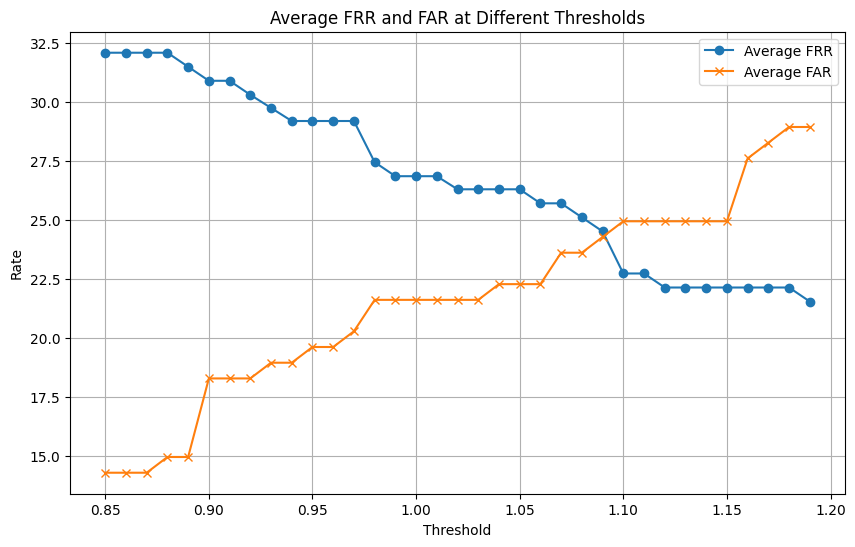

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a range of threshold values
thresholds = np.arange(0.85, 1.2, 0.01)
gestures = ['circle', 'square', 'triangle', 'bowtie', 'tornado', 'signature']

# Initialize lists to store averaged FRRs and FARs for each threshold
avg_FRRs = []
avg_FARs = []

for threshold in thresholds:
    total_FRR = 0
    total_FAR = 0
    count_gestures = 0

    for gesture in gestures:
        storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures(f'files/{gesture}_28012024/')
        FRR, _ = g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=threshold)
        total_FRR += FRR
        
        if gesture != 'signature':
            FAR, _ = g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=threshold)
            total_FAR += FAR
            count_gestures += 1

    avg_FRRs.append(total_FRR / len(gestures))
    avg_FARs.append(total_FAR / count_gestures)

# Create a DataFrame
df = pd.DataFrame({'Average FRR': avg_FRRs, 'Average FAR': avg_FARs}, index=thresholds)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average FRR'], label='Average FRR', marker='o')
plt.plot(df.index, df['Average FAR'], label='Average FAR', marker='x')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Average FRR and FAR at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
df 

,Average FRR,Average FAR
0.05,98.333333,0.000000
0.06,97.777778,0.571429
0.07,92.777778,0.571429
0.08,85.555556,1.142857
0.09,68.888889,1.714286
0.10,52.222222,1.714286
0.11,46.111111,2.380952
0.12,41.666667,3.714286
0.13,39.444444,4.380952
0.14,37.777778,4.380952
